<a href="https://colab.research.google.com/github/Misaelchavez16/Titanic_Machine_Learning_from_Disaster/blob/main/Probability_theory_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Show the applicability of the 'Law of Large Numbers' to demonstrate the probability of obtaining a 3 when rolling a die. Consider 5000 rolls. (5 points)

Average value after 50000 rolls: [0.16984 0.16668 0.16556 0.16456 0.16726 0.1661 ]


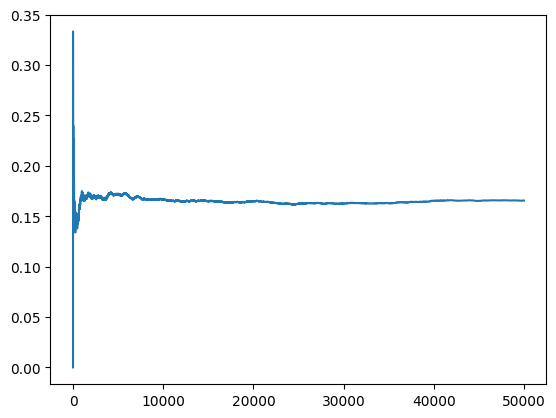

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_rolls = 50000

rolls = np.random.randint(1, 7, size=num_rolls)
X_roll = np.arange(num_rolls)

average = np.mean(rolls)

dice_roll_step = np.array([], dtype=int)
step = 0
probabilities_each_roll = np.arange(num_rolls, dtype=float)


for i in rolls:
    step += 1
    dice_roll_step = np.append(dice_roll_step, i)
    outcome_counts = np.bincount(dice_roll_step)[1:]
    probabilities = outcome_counts / len(dice_roll_step)
    probabilities_each_roll[step-1] = probabilities[2]



plt.plot(X_roll, probabilities_each_roll)
plt.show

print(f"Average value after {num_rolls} rolls: {probabilities}")

Use the PIMA diabetes dataset and train the following classifiers (if possible) based on Bayesian Probability Theorem:

* Gaussian Naive Bayes (GaussianNB)
* Categorical Naive Bayes (CategoricalNB)
* Multinomial Naive Bayes (MultinomialNB)

Show all the process (Data extraction, Data split, Model train, Plotting results)
(5 points)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("diabetes-2.csv")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = data.drop('Outcome', axis=1)
y = data["Outcome"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gnb = GaussianNB()
cnb = CategoricalNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train, y_train)
cnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_gnb = gnb.predict(X_test)
# y_pred_cnb = cnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

We can't run Categorical NB because the dataset contains features with a greater number of unique values than the classifier is designed to handle. CategoricalNB is specifically suited for categorical features with a limited number of distinct categories.

In [ ]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
#accuracy_cnb = accuracy_score(y_test, y_pred_cnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

In [ ]:
print(f"Gaussian Naive Bayes Accuracy : {accuracy_gnb:.2f}")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.2f}")

Gaussian Naive Bayes Accuracy : 0.77
Multinomial Naive Bayes Accuracy: 0.66


<ipython-input-116-ec34a32a6c28>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels([''] +class_labels)
<ipython-input-116-ec34a32a6c28>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(['']+ class_labels)
<ipython-input-116-ec34a32a6c28>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['']+class_labels)
<ipython-input-116-ec34a32a6c28>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(['']+ class_labels)


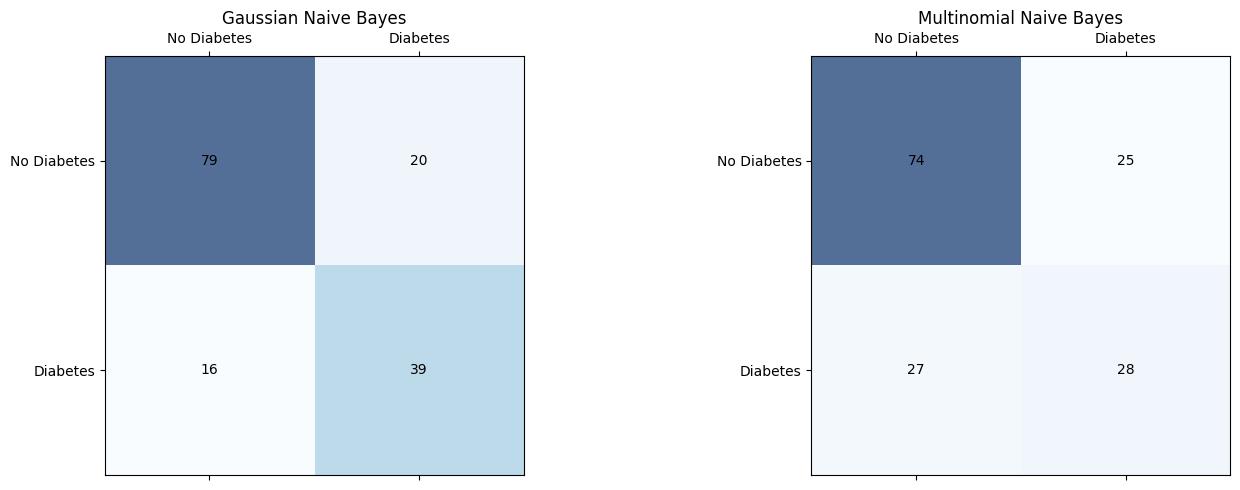

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

confusion_matrix_gnb= confusion_matrix(y_test, y_pred_gnb)
confusion_matrix_mnb= confusion_matrix(y_test, y_pred_mnb)
class_labels =['No Diabetes', 'Diabetes']

# Gaussian Naive Bayes
axes[0].matshow(confusion_matrix_gnb, cmap=plt.cm.Blues, alpha=0.7)
for i in range(2):
    for j in range(2):
        axes[0].text(j,i,str(confusion_matrix_gnb[i, j]),va='center', ha='center')
axes[0].set_title('Gaussian Naive Bayes')
axes[0].set_xticklabels([''] +class_labels)
axes[0].set_yticklabels(['']+ class_labels)


# Multinomial Naive Bayes
axes[1].matshow(confusion_matrix_mnb,cmap=plt.cm.Blues, alpha=0.7)
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusion_matrix_mnb[i,j]), va='center', ha='center')
axes[1].set_title('Multinomial Naive Bayes')
axes[1].set_xticklabels(['']+class_labels)
axes[1].set_yticklabels(['']+ class_labels)

plt.tight_layout()
plt.show()

In [ ]:
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb, target_names=class_labels))

print("\nClassification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_mnb, target_names=class_labels))

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

 No Diabetes       0.83      0.80      0.81        99
    Diabetes       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

 No Diabetes       0.73      0.75      0.74        99
    Diabetes       0.53      0.51      0.52        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154

